In [1]:
from mma import *
import gudhi as gd
import numpy as np
import matplotlib.pyplot as plt
from multipers import *
from joblib import Parallel, delayed
from multiprocessing import Pool, Manager, cpu_count
from sklearn.neighbors import KernelDensity
from joblib import parallel_backend
from numpy.polynomial.polynomial import polyfit
from benchmark_functions import *
from pandas import read_csv
from gudhi.point_cloud.timedelay import TimeDelayEmbedding
import seaborn as sns
from tqdm import tqdm
from benchmark_functions import *

In [2]:
def get_dataset(dataset = "Coffee"):
    dataset_path = "./UCR/" + dataset + "/" + dataset + "_TRAIN.tsv"
    data = np.array(read_csv(dataset_path, delimiter='\t', header=None, index_col=0))
    return data
data = get_dataset("Coffee")

In [3]:
tde = TimeDelayEmbedding().transform(data)[0]
len(tde)

284

In [4]:
np.mean(tde), np.std(tde)

(0.00860293417523468, 0.9946588683077072)

In [5]:
%%time
nlines = 200
image_bandwidth=0.01
resolution = [100,100]
# simplextree = gd.AlphaComplex(points=tde).create_simplex_tree(max_alpha_square=0.5)
simplextree = gd.AlphaComplex(points=tde).create_simplex_tree(max_alpha_square=0.01)
print(simplextree.num_simplices(), simplextree.dimension())

complex_filtration = np.array([simplextree.filtration(s) for s,_ in simplextree.get_simplices()])
kde = KernelDensity(kernel='gaussian', bandwidth=0.3).fit(tde)
density_filtration = -np.array(kde.score_samples(tde))

boundary, filtration = ls_boundary_density(simplextree, [complex_filtration, density_filtration], [0])

box = [[min(filtration[:,0]),min(filtration[:,1])],[max(filtration[:,0]),max(filtration[:,1])]]
weird_box = [min(filtration[:,0]),max(filtration[:,0]),min(filtration[:,1]),max(filtration[:,1])]

precision = (box[1][1] + box[1][0] - box[0][1] - box[0][0]) / (nlines)


2743 3
CPU times: user 20.4 ms, sys: 2.04 ms, total: 22.5 ms
Wall time: 21.3 ms


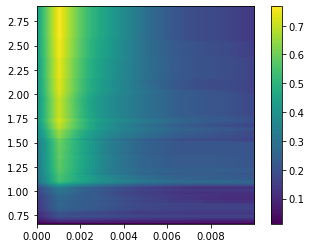

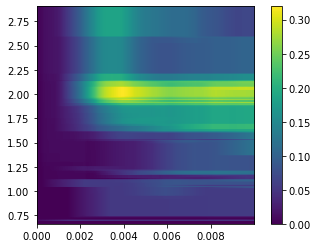

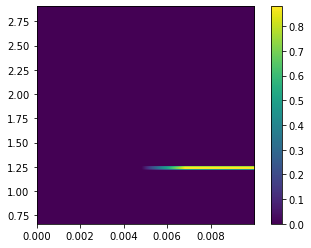

100%|█████████████████████████████████████████| 200/200 [04:37<00:00,  1.39s/it]


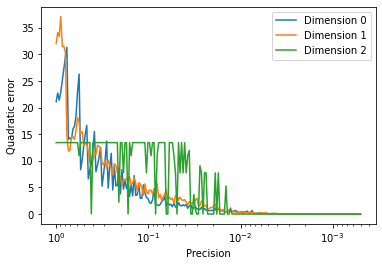

In [6]:
convergence_image(boundary, filtration, 0.0005,0.001, num=200,save="UCR_Coffee");